In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as ss

**A. Calculate eigenvectors and eigenvalues by hand**

Using a very simple example with a best dataset




(1.0, 0.0)


Text(0, 0.5, 'y')

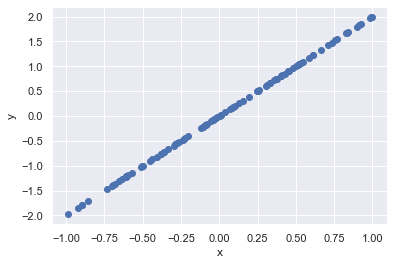

In [24]:
x = np.random.uniform(-1,1,100)
y = 2*x
plt.scatter(x,y)
print(ss.pearsonr(x,y))
plt.xlabel('x')
plt.ylabel('y')

1. Get the data matrix
2. Subtract the mean (optional)
3. Calculate covariance matrix

In [25]:
X_matrix = np.stack((x,y),axis=1)
print(len(X_matrix),len(X_matrix[0]))
#X_matrix[i,j] 

100 2


In [26]:
X_matrix[:,0]=X_matrix[:,0]-np.mean(X_matrix[:,0])
X_matrix[:,1]=X_matrix[:,1]-np.mean(X_matrix[:,1])
#print(X_matrix)

In [27]:
Covariance = np.cov(X_matrix.T)
print(Covariance)

[[0.26912372 0.53824745]
 [0.53824745 1.07649489]]


***Now, calculate the eigenvalues and eigenvectors by hand.***

What is the answer?





**B. Run PCA for this case**

1. Import PCA and run!

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_matrix)

# input matrx[i,j] i Number of object j Number of features

PCA(n_components=2)

2. Eigenvectors as pca.components_

In [9]:
print('1st Eigenvector:',pca.components_[0])
print('2nd Eigenvector:',pca.components_[1])

1st Eigenvector: [0.4472136  0.89442719]
2nd Eigenvector: [ 0.89442719 -0.4472136 ]


3. Eigenvalues as pca.explained_variance_

In [10]:
print('Eigenvalues',pca.explained_variance_)
print('Explain variance',pca.explained_variance_ratio_)

Eigenvalues [1.64107471e+00 9.98052400e-33]
Explain variance [1.00000000e+00 6.08169998e-33]


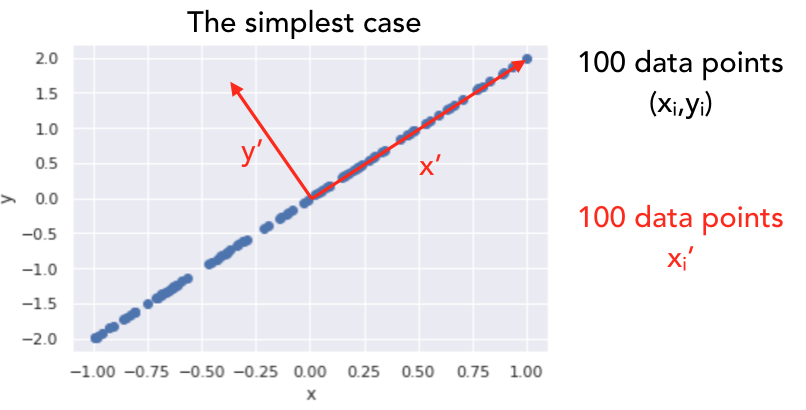

**The new xy values - coefficients**

The dot between original data and eigenvectors




In [11]:
new_x = np.dot(X_matrix,pca.components_[0])
new_y = np.dot(X_matrix,pca.components_[1])
print(X_matrix[1,:])
print(new_x[1],new_y[1])
#print(new_y)

[0.97060779 1.94121557]
2.1703449914763984 0.0


In [12]:
coefficients = pca.transform(X_matrix)

In [13]:
coefficients[1,0]

2.1703449914763984

In [14]:
pca.components_[0]

array([0.4472136 , 0.89442719])

**PCA can reconstruct the original dataset**

Very important to make sure we are doing right!

(x,y) = coefficient1 x eigenvector 1+ coefficient2 x eigenvector2

In [15]:
#x_reconstruct = np.arange(0,100)*0.0
#y_reconstruct = np.arange(0,100)*0.0
x_reconstruct = np.zeros((100,2))
for i_object in range(0,100):
    #x_reconstruct[i_object]=new_x[i_object]*pca.components_[0][0]+new_y[i_object]*pca.components_[1][0]
    #y_reconstruct[i_object]=new_x[i_object]*pca.components_[0][1]+new_y[i_object]*pca.components_[1][1]
    x_reconstruct[i_object]=coefficients[i_object,0]*pca.components_[0]+coefficients[i_object,1]*pca.components_[1]+pca.mean_


In [16]:
print(x_reconstruct[1])
print(X_matrix[1])

[0.97060779 1.94121557]
[0.97060779 1.94121557]


**Eigenvectors are orthogonal.**

In [17]:
np.dot(pca.components_[0],pca.components_[1])

0.0

**C. Exercise SDSS quasar spectra**

1. Download data https://drive.google.com/file/d/1bfZ5uCvZAFTJ67mdAges3Bd6VEne3qdM/view?usp=sharing

In [18]:
#from google.colab import drive
#drive.mount(dd'/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/Colab Notebooks/"

In [20]:
import astropy.io.fits as pf
from sklearn.decomposition import  PCA
#dir_d = "/Users/tlan/Dropbox/Astro_Research/My_Classes/110_Fall/data_analysis_in_astronomy/code/Week_9/"
data = pf.open('clean_spectra.fits')
# data[0].data[N_object,N_pixel]
# data[2].data log_wavelength
wavelength = 10**data[2].data

In [21]:
len(wavelength)

2483

Text(0.5, 0, 'Wavelength [$\\rm \\AA$]')

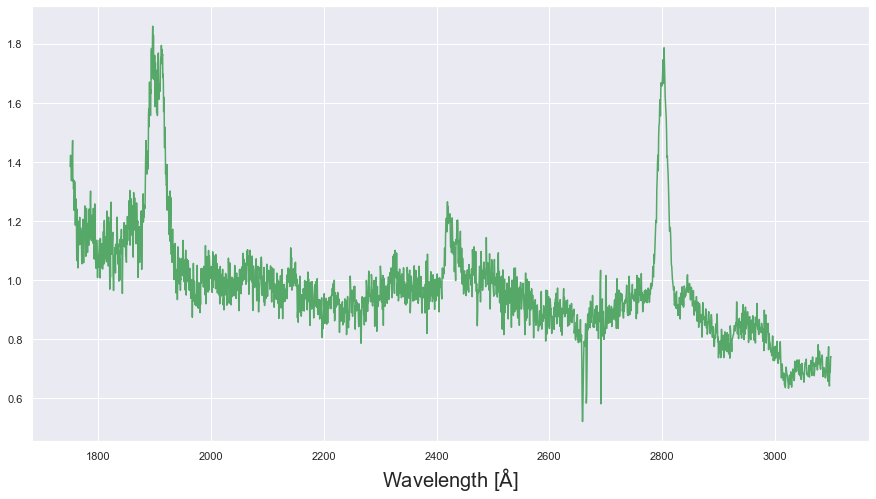

In [22]:
plt.figure(figsize=(15,8))
#plt.plot(wavelength,data[0].data[10,:],color='C0')
#plt.plot(wavelength,data[0].data[701,:],color='C1')
plt.plot(wavelength,data[0].data[100,:],color='C2')
plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
#plt.ylabel('Flux []')

**Do the PCA and explore the outputs!**

Follow the code above!

1. Data structure matrix [i_object, i_feature]


2. pca = PCA(n_components=10)
   
   pca.fit(matrix)
   
   
3. plot wavelength, pca.mean_


4. plot wavelength, pca.components_[i] i=0,1,2,3,4,5,6

# -------------------------------------------

In [1]:
# Exercise 2
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

[[ 0.  0.  3. 10. 14.  3.  0.  0.]
 [ 0.  8. 16. 11. 10. 13.  0.  0.]
 [ 0.  7. 14.  0.  1. 15.  2.  0.]
 [ 0.  2. 16.  9. 16. 16.  1.  0.]
 [ 0.  0. 12. 16. 15. 15.  2.  0.]
 [ 0.  0. 12. 10.  0.  8.  8.  0.]
 [ 0.  0.  9. 12.  4.  7. 12.  0.]
 [ 0.  0.  2. 11. 16. 16.  9.  0.]]


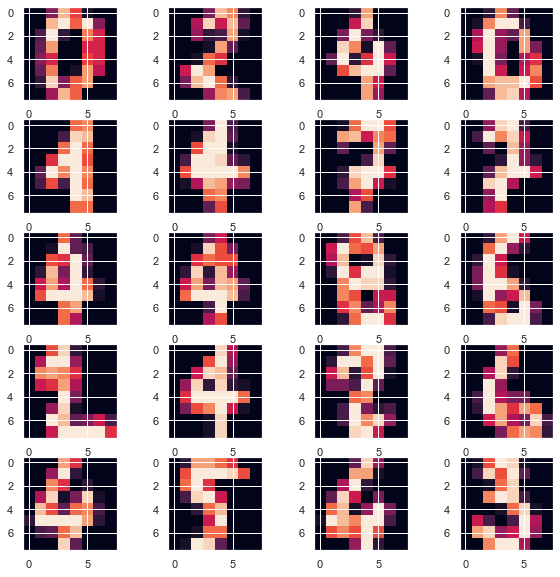

In [4]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(digits.data[i*50].reshape(8,8))
print(digits.data[500].reshape(8,8))

### Do PCA with this dataset
### Get the coeff

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(coeff[:,0],coeff[:,1],c=digits.target,cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()

NameError: name 'coeff' is not defined

<Figure size 1080x720 with 0 Axes>